# Mine time

Time taken to perform work in javascript vs Rust compiled to WASM.

The work is the time taken to find a sha256 hash for a given string that starts with 5 0's `00000`, incrementing a number at the end till the 5 0's are found

eg for a string `"hello"` starting at `hello1` this will occur when `hello156056` gets run meaning 156,056 iterations of the sha256 algorithm to give a hash answer of `"0000037660ee0e22df67a053537e000325bbfad2cce9b8b7c795f6aa961d5cb7"`.

compare the time take in JS, Rust compiled to WASM and writing WAST from scratch.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


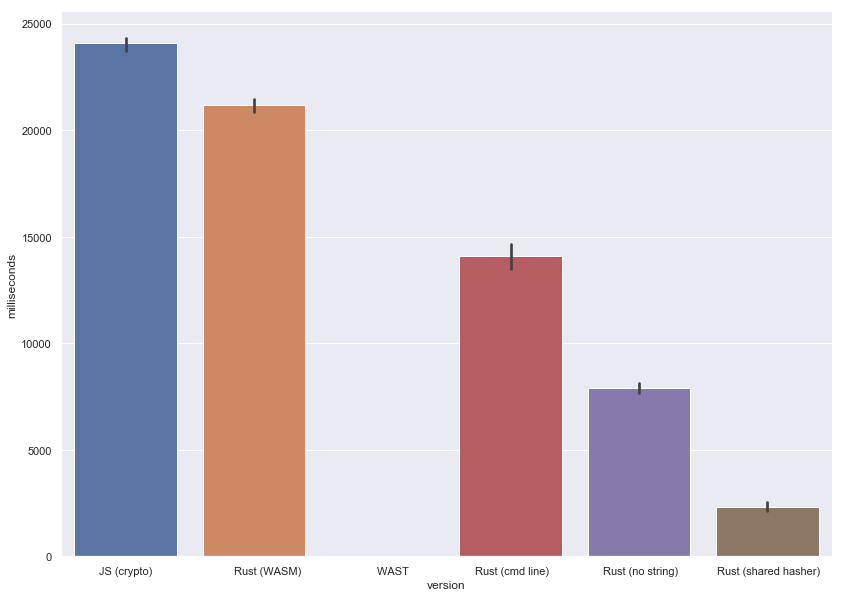

,JS (crypto),Rust (WASM),WAST,Rust (cmd line),Rust (no string),Rust (shared hasher)
0,24311.983154,20595.083008,0,13491.0,8136,2142
1,23726.912109,21420.069824,0,14662.0,7868,2150
2,24154.236084,21448.466797,0,14095.0,7683,2711


In [65]:
import sys
# uncomment if libraries are needed to be imported
# !{sys.executable} -m pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from io import StringIO    

f = StringIO('''\
JS (crypto),         Rust (WASM),       WAST, Rust (cmd line), Rust (no string), Rust (shared hasher)
24311.983154296875,  20595.0830078125,  0,    13491.0,         8136,             2142
23726.912109375,     21420.06982421875, 0,    14662.0,         7868,             2150
24154.236083984375,  21448.466796875,   0,    14095.0,         7683,             2711
''')

df = pd.read_csv(f)

# without sns could just do this
# df.mean().plot(kind='bar')

ax = sns.catplot(kind="bar", height=8.27, aspect=11.7/8.27, data=df)
ax.set(xlabel='version', ylabel='milliseconds')

plt.show()

df

## Meaning

* **JS (crypto)** uses the js crypto lib
  ```
  crypto.createHash("sha256").update(text).digest("hex");
  ```
* **Rust (WASM)** rust below compiled to WASM - with error as only deals with empty string ""
* **Rust (cmd line)** first best rust version run from command line
* **Rust (no string)** dealing with the result as a hex string
* **Rust (shared hasher)** keeping the creating of the hasher `let mut hasher = Sha256::new();` outside of the loop and using a `let result = hasher.clone().result();` but this lead to the wrong answer as the previous hasher value influenced the next value?